# Introduction

A research group at UBC is collecting data about how people play video games. They created a MineCraft server and recorded each player’s data. This group is interested in what player characteristics are most predictive of subscribing to a game-related newsletter. The player data includes a broad set of variables that reflect their characteristics. For this project, I have limited the player variables to be their age and the number of hours played on the server to find out whether those characteristics specifically are indicative of whether or not the players will be subscribed to the game-related newsletter. 

Hence, I propose the following question:

**Can the age of a player, and the number of hours they have played in the server, predict whether they are subscribed to the game-related newsletter?**

# Methods

**1.0 Loading in Data**

I begin by loading the necessary libraries and reading the data into this workspace.

In [1]:
library(repr)
library(tidyverse)
library(rvest)
library(tidymodels)
library(themis)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────

In [2]:
url <- "https://raw.githubusercontent.com/terrayyyy/ray_ds_project/refs/heads/main/players.csv"

players_data <- read_csv(url)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**1.1 Isolating Variables**

I will then isolate the variables I am interested in.

The research question that I had proposed only requires the Subscription Status (subscribe), Time Played (played_hours), and Age of Player (Age) columns from the current data. In addition to that, I will also convert the Subscription Status column into a categorical variable - to which will be my target variable - by turning it into a factor.

In [3]:
players_wrangled <- players_data |>
select(subscribe, played_hours, Age) |>
mutate(subscribe = as_factor(subscribe))

players_wrangled

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
⋮,⋮,⋮
FALSE,0.0,17
FALSE,2.3,17
TRUE,0.2,NA


**1.2 Removing NA Values**

It seems that there might be some Not Applicable (NA) values in our tibble. First I will check for NA values.

In [4]:
players_missing <- sum(is.na(players_wrangled))
players_missing

[1] 2

I can see that there are 2 missing values (NA values), hence I will drop those values.

In [5]:
players_cleaned <- players_wrangled |>
drop_na()
players_cleaned

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
⋮,⋮,⋮
FALSE,0.3,22
FALSE,0.0,17
FALSE,2.3,17


**2.0 Creating a Visualization**

To visualize the data I plan on analyzing, I will plot the variables into a graph - with x and y values (Age of Player and Time Played) being the predictor variables, and the color of the points being the target variable (Subscription Status).

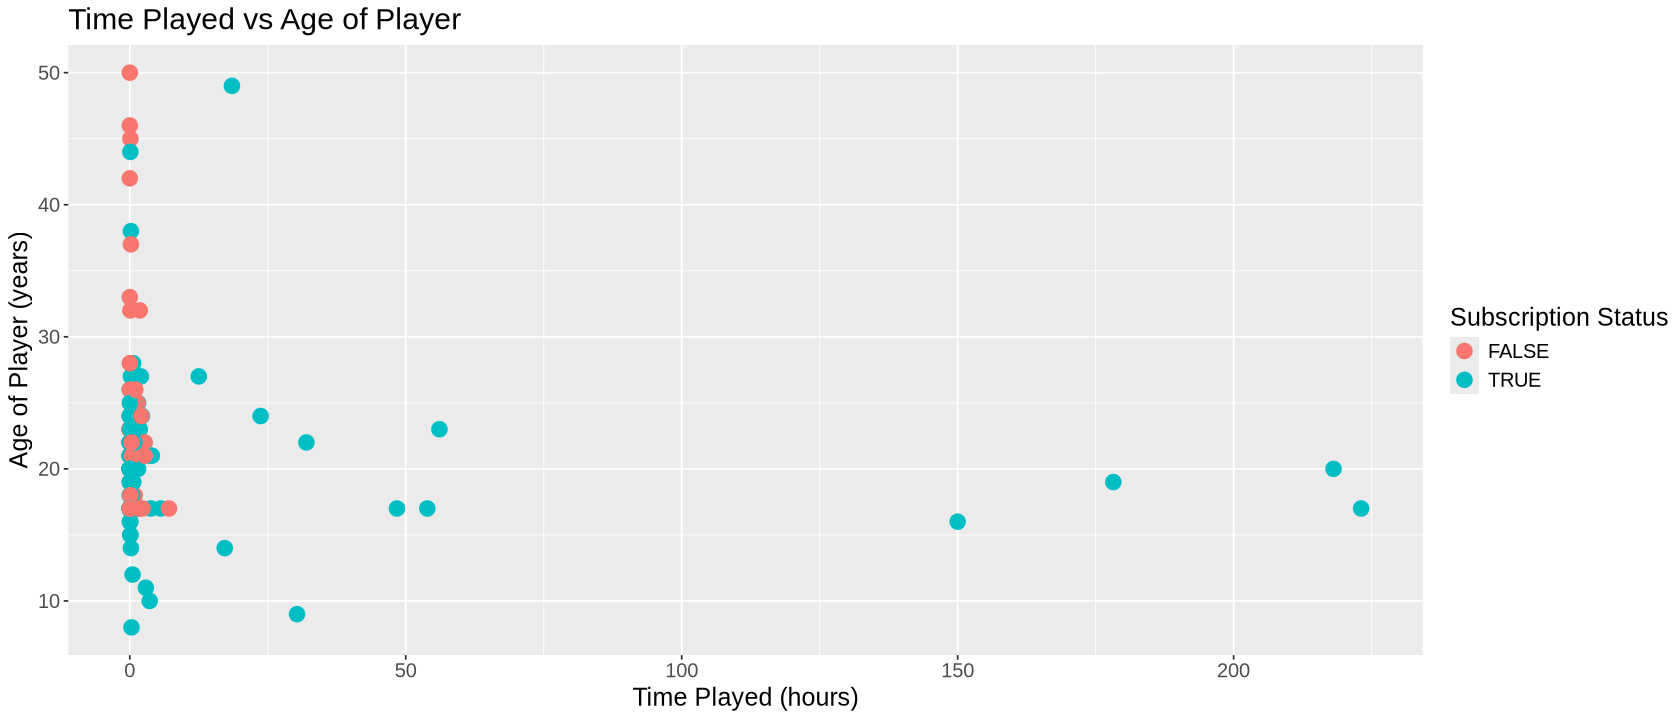

In [6]:
options(repr.plot.width = 14, repr.plot.height = 6)
players_plot <- players_cleaned |>
ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
                       geom_point(size = 4) +
                       labs(x = "Time Played (hours)", y = "Age of Player (years)", color = "Subscription Status") +
                       ggtitle("Time Played vs Age of Player") +
                       theme(text = element_text(size = 15))

players_plot

Its hard to tell if there is any correlation in this data as the majority of the data is in the hard left side of the graph. So, we will need to zoom in on where the majority of the datapoints are. Additionally, it seems that there is way more subscribed than unsubscribed, we will check for that in our following line of code.

subscribe,count
<fct>,<int>
FALSE,52
TRUE,142


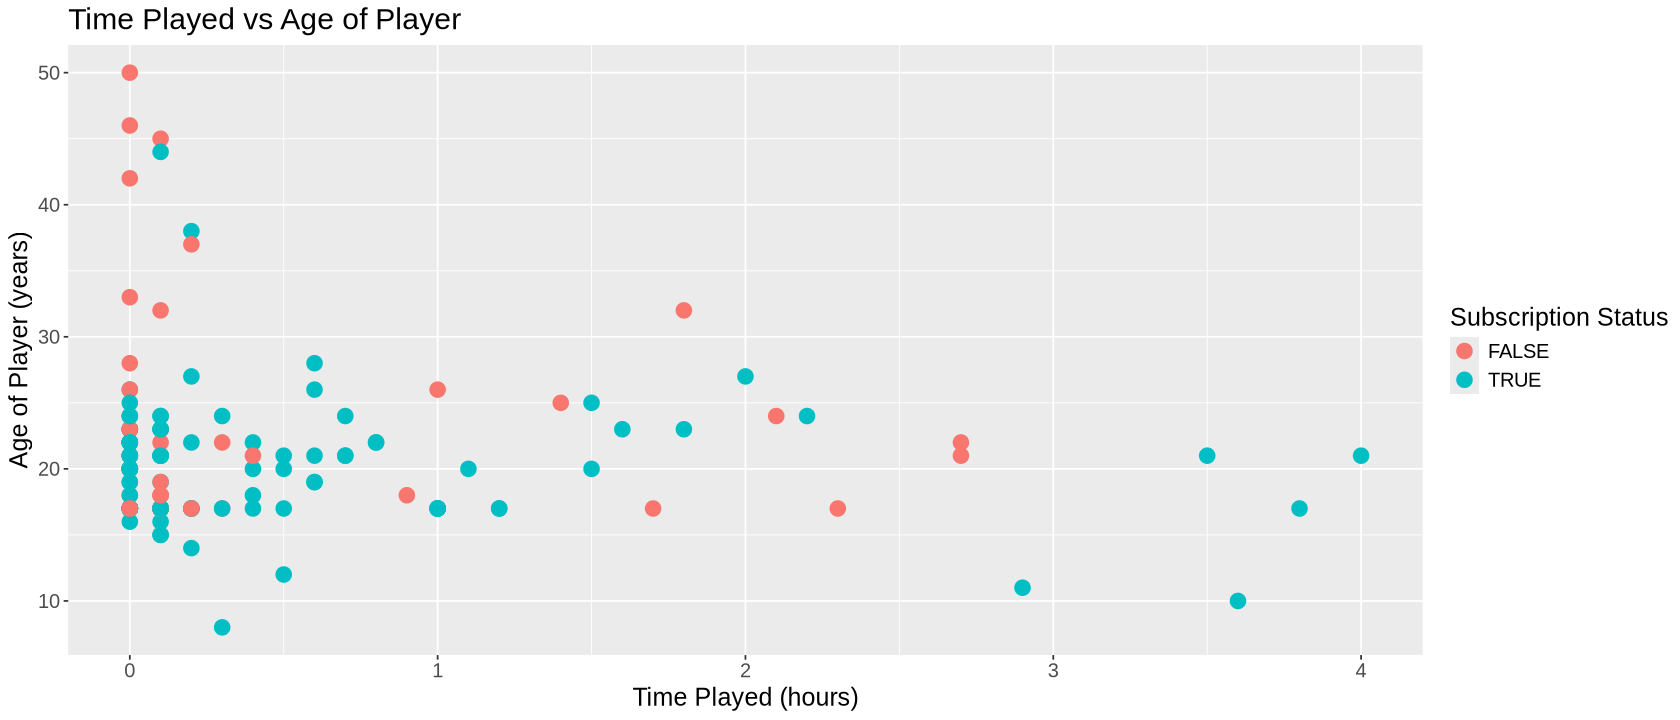

In [28]:
players_plot_shortened <- players_cleaned |>
filter(played_hours < 5) |>
ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
                       geom_point(size = 4) +
                       labs(x = "Time Played (hours)", y = "Age of Player (years)", color = "Subscription Status") +
                       ggtitle("Time Played vs Age of Player") +
                       theme(text = element_text(size = 15))

players_plot_shortened

players_cleaned |>
    count(subscribe) |>
    rename(count = n)

**3. MODELLING**

Now we have a clearer view of where the majority of data points are, but it is still hard to see if there is any correlation. It is also apparent now that there is significantly more players who are subscribed to the game-related newsletter than unsubscribed. Hence, a KNN classification model will be used to see how accurate we can classify any new points (a classification model is used because we are trying to classify the points into categories).

**3.0 Splitting the Data**

First, I will split the data into a training set and a testing set. This is done so that I can create my modelling on my training data, and use the testing data to evaluate how accurate the model is. Additionally, the training data will be split again into training set and validation set using `vfold_cv` function, which is done to evaluate the performance of the model on unseen data.

In [42]:
set.seed(1212) 

players_split <- initial_split(players_cleaned, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

**3.1 Preprocessing the Training Model**

Before moving on, I will preprocess the model first by adding `library(themis)` to the packages list in the beggining, alongside adding `step_upsample` in the recipe for balancing. Scaling and balancing the data will ensure that the weight of the variables are accurate - which is important as the classification model uses the euclidean distance formula to classify points.

In [43]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  step_upsample(subscribe)

**3.2 Creating the Model Specification**

Then, I will create the model specification for K-nearest neighbor classification. I will set
`neighbors = tune()` because I want to test different K values to see which one is the most accurate. I will be assessing K values from 1 to 15.

In [58]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

gridvals <- tibble(neighbors = seq(1, 20))

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


**3.3 Chaining Previous Steps to Collect Accuracy Metrics**

I will use the `workflow()` function to chain together the model specification, preprocessing recipe. I will also applly `tune_grid()` function to estimate classifier accuracy for various K neighbors.

In [59]:
set.seed(1212)

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4544335,5,0.02135910,Preprocessor1_Model01
2,accuracy,binary,0.4475205,5,0.02808466,Preprocessor1_Model02
3,accuracy,binary,0.3851888,5,0.03052891,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.4611002,5,0.04004738,Preprocessor1_Model18
19,accuracy,binary,0.4332841,5,0.03398398,Preprocessor1_Model19
20,accuracy,binary,0.4270936,5,0.02520993,Preprocessor1_Model20


**3.4 Finding Optimal Number of Neighbors**

I can then plot the Accuracy Estimate (mean) against Neighbors (neighbors) to see which number of neighbors have the highest accuracy estimate, hence being the most optimal value of K.

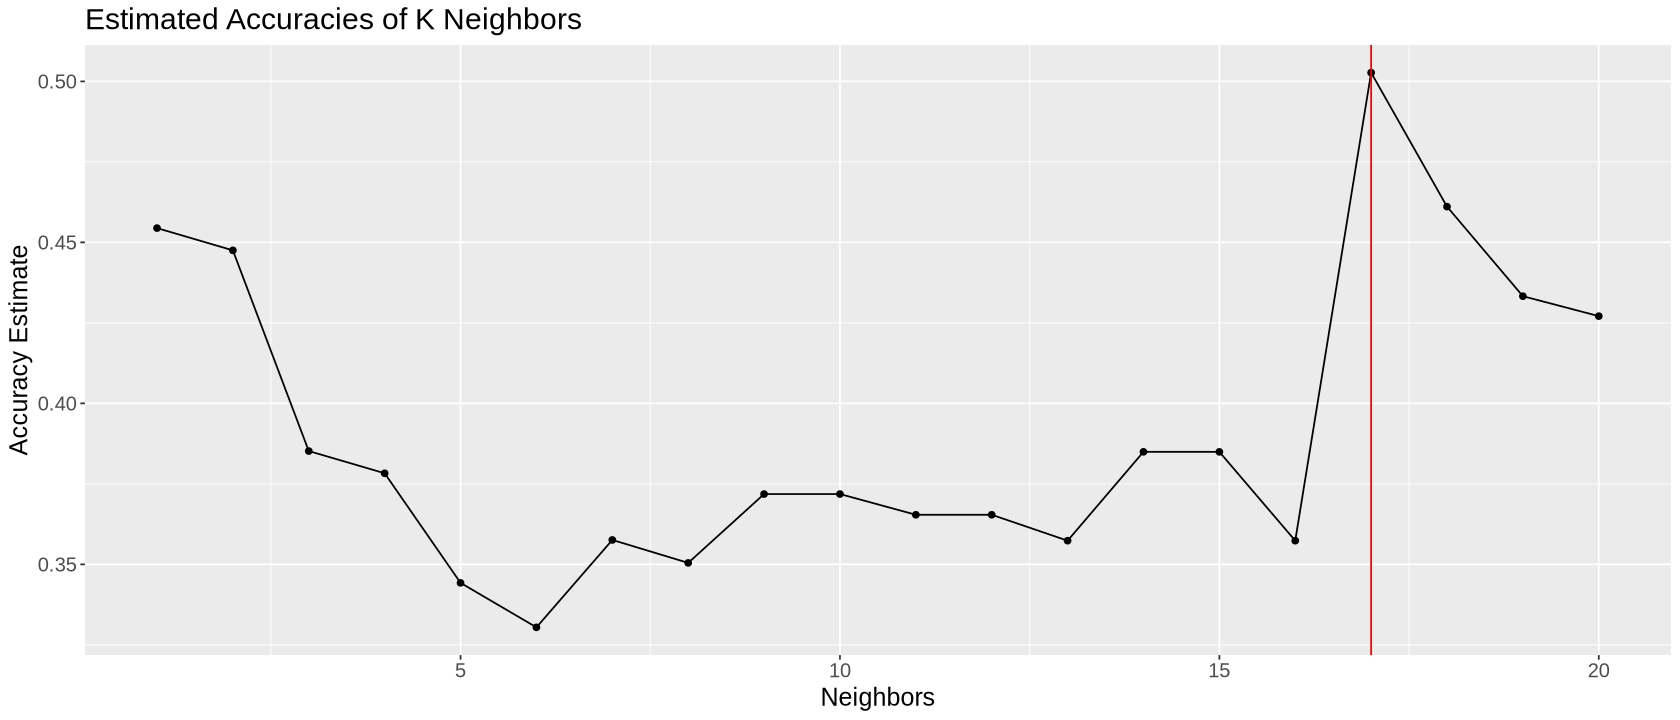

In [70]:
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 15)) +
    ggtitle("Estimated Accuracies of K Neighbors") +
    geom_vline(xintercept = 17, color = "red")
cross_val_plot

I can see that the accuracy estimate is the highest when neighbors K = 17. Hence, I this number of neighbors to find the best model for classifying a point into a subscription status based on the player's age and the number of hours played on the server.

**3.5 Making the New Model with the Best Parameter Value**

Before I can find the evaluation statistics for the new model, I have to first apply the number of neighbors with the highest accuracy estimate (K = 17) into the previous model specification - and run the new workflow, retraining the classifier using `fit()`

In [50]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
  set_engine("kknn") |>
  set_mode("classification")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = players_train)

# Results

**4.0 Evaluating the Model**

I can then use the `predict()` function to get the predictions column that predicts subscription status, to which I will merge with the original dataset.

In [67]:
players_predictions <- predict(players_fit, players_test) |> 
    bind_cols(players_test)

With this, I will use the `metrics()` function to compute the accuracy of the predicted subscription status' to the true values in the test set

In [65]:
players_acc <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
players_acc

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5510204
kap,binary,0.2277937


More on the accuracy can be seen when we use a confusion matrix `conf_mat()`.

In [66]:
players_cm <- players_predictions |> 
    conf_mat(truth = subscribe, estimate = .pred_class)
players_cm

          Truth
Prediction FALSE TRUE
     FALSE    12   21
     TRUE      1   15

# Discussion

The evaluation of the model showed us that the accuracy of the model is 55.1%.

This means that my model only made a correct prediction 55.1% of the time, and since there are only two classes (binary) this is only barely better than if it were to be randomly guessed. This shows that there is not much of a correlation between the subscription status and the age and number of hours played by a player.

This was unexpected as I had hypothesized that the age and dedication of a person to a video game would effect their willingness to subscribe to a game-related newsletter. This might indicate that the game-related newsletter is not catered towards a target audience, or that there are other variables I did not include in my model that may have been a better predictor on whether they would have subscribed or not.

Nevertheless, these findings clarified that fact, and with this, the researchers can look at other characteristics of a player to indicate whether they are subscribed or not.